## Load Data

In [260]:
import pandas as pd 

In [261]:
dataset  = pd.read_csv('dataset_revisi_fix.csv', encoding = 'ISO-8859-1', delimiter=';')

In [262]:
dataset.head()

,Tweet,Provider,Label1,Label2,Label3,Label
0,RT @Dennysiregar7: Apa saya sendiri yang meras...,Telkomsel,-1,-1,-1,-1
1,Hallooo bagaimana cara pembayaran kartuHalo ya...,Telkomsel,-1,-1,-1,-1
2,"masalahnya, biasanya habisnya di malam hari (p...",Telkomsel,-1,-1,-1,-1
3,"@Telkomsel Lah, kan Erna juga yg balas.. haha,...",Telkomsel,-1,-1,-1,-1
4,@Ardimnsyr Tumben ki sede baik ini telkomsel \...,Telkomsel,1,1,1,1


### All provider

In [263]:
import matplotlib.pyplot as plt

In [264]:
colors = ['gold', 'lightcoral', 'lightskyblue']

In [265]:
all_pos = dataset['Label'].loc[dataset['Label'] == 1].count()
all_net = dataset['Label'].loc[dataset['Label'] == 0].count()
all_neg = dataset['Label'].loc[dataset['Label'] == -1].count()

In [266]:
all_pos

192

In [267]:
all_net

101

In [268]:
all_neg

907

Text(0.5,0.98,'Persentase Sentimen')

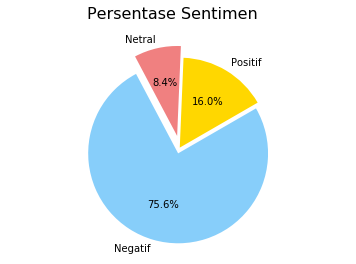

In [269]:
plt.pie([all_pos,all_net,all_neg], labels=["Positif","Netral","Negatif"], colors=colors, startangle=30, explode = (0, 0.2, 0.1), radius = 1.5, autopct = '%1.1f%%')
plt.axis('equal')
plt.suptitle('Persentase Sentimen', fontsize=16)

## Preprocessing

### Lowercase

In [270]:
dataset['Tweet'] = dataset['Tweet'].apply(lambda x: ''.join([w for w in x.lower()]))

In [271]:
dataset.head()

,Tweet,Provider,Label1,Label2,Label3,Label
0,rt @dennysiregar7: apa saya sendiri yang meras...,Telkomsel,-1,-1,-1,-1
1,hallooo bagaimana cara pembayaran kartuhalo ya...,Telkomsel,-1,-1,-1,-1
2,"masalahnya, biasanya habisnya di malam hari (p...",Telkomsel,-1,-1,-1,-1
3,"@telkomsel lah, kan erna juga yg balas.. haha,...",Telkomsel,-1,-1,-1,-1
4,@ardimnsyr tumben ki sede baik ini telkomsel \...,Telkomsel,1,1,1,1


### Data Cleansing

### Remove URL, Username, Character, Short Words

In [272]:
import numpy as np

In [273]:
import re

In [274]:
def preprocess_remove(to_remove, tweet):
    r = re.findall(to_remove, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet    

In [275]:
dataset['Tweet'] = np.vectorize(preprocess_remove)('http[\w]*',dataset['Tweet'])

In [276]:
# dataset['Tweet'].head()

In [277]:
dataset['Tweet'] = np.vectorize(preprocess_remove)('@[\w]*',dataset['Tweet'])

In [278]:
# dataset['Tweet'].head()

In [279]:
dataset['Tweet'] = dataset['Tweet'].str.replace('[^a-zA-Z]', ' ')

In [280]:
# dataset['Tweet'].head()

In [281]:
dataset['Tweet'] = dataset['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [282]:
dataset.head()

,Tweet,Provider,Label1,Label2,Label3,Label
0,saya sendiri yang merasa kalau semakin hari se...,Telkomsel,-1,-1,-1,-1
1,hallooo bagaimana cara pembayaran kartuhalo ke...,Telkomsel,-1,-1,-1,-1
2,masalahnya biasanya habisnya malam hari ketika...,Telkomsel,-1,-1,-1,-1
3,erna juga balas haha mohon segera direspon kel...,Telkomsel,-1,-1,-1,-1
4,tumben sede baik telkomsel,Telkomsel,1,1,1,1


### Tokenisasi & Stemming

In [283]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [284]:
factory = StemmerFactory()

In [285]:
stemmer = factory.create_stemmer()

In [286]:
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [287]:
dataset['Tweet'] = dataset['Tweet'].apply(stem_sentences)

In [288]:
dataset['Tweet'].head()

0    saya sendiri yang rasa kalau makin hari makin ...
1    hallooo bagaimana cara bayar kartuhalo kenapa ...
2    masalah biasa habis malam hari ketika buka pag...
3    erna juga balas haha mohon segera direspon kel...
4                           tumben sede baik telkomsel
Name: Tweet, dtype: object

### Removing StopWords (NLTK)

In [289]:
from nltk.corpus import stopwords

In [290]:
stop_words = stopwords.words('indonesian')

In [291]:
import string
new_tweet_text = []
word_dic = []
for text in dataset['Tweet']:
    new_text = []
    for word in text.split():
        if word.lower() not in stop_words:
            new_text.append(word.lower())
            word_dic.append(word.lower())
    new_text = " ".join(new_text)
    new_tweet_text.append(new_text)
    
dataset['Tweet'] = new_tweet_text

In [292]:
dataset['Tweet'].head()

0                                    lelet internetnya
1                        hallooo bayar kartuhalo sulit
2    habis malam buka pagi otomatis puksa potong no...
3    erna balas haha mohon direspon keluh atad lele...
4                                tumben sede telkomsel
Name: Tweet, dtype: object

### Remove words - Custom (singkatan, alay, dll)

In [293]:
custom = ['ya','yg','min','banget','bgt','udah', 'pake','pakai','kalo','kali','mulu','gini','kasih','ilang','gimana','pdhl','lot']

In [294]:
dataset['Tweet'] = dataset['Tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in custom]))

In [295]:
dataset['Tweet'].head()

0                                    lelet internetnya
1                        hallooo bayar kartuhalo sulit
2    habis malam buka pagi otomatis puksa potong no...
3    erna balas haha mohon direspon keluh atad lele...
4                                tumben sede telkomsel
Name: Tweet, dtype: object

## Term Frequency

In [296]:
from sklearn.feature_extraction.text import CountVectorizer

In [297]:
count_vec = CountVectorizer()
count_vec.fit(dataset['Tweet'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [298]:
len(count_vec.get_feature_names())

2404

In [299]:
import numpy as np

In [300]:
neg_matrix = count_vec.transform(dataset[dataset['Label'] == -1]['Tweet'])
net_matrix = count_vec.transform(dataset[dataset['Label'] == 0]['Tweet'])
pos_matrix = count_vec.transform(dataset[dataset['Label'] == 1]['Tweet'])
neg_tf = np.sum(neg_matrix,axis=0)
net_tf = np.sum(net_matrix,axis=0)
pos_tf = np.sum(pos_matrix,axis=0)
negatif = np.squeeze(np.asarray(neg_tf))
netral = np.squeeze(np.asarray(net_tf))
positif = np.squeeze(np.asarray(pos_tf))
term_tf = pd.DataFrame([negatif,netral,positif],columns=count_vec.get_feature_names()).transpose()

In [301]:
term_tf.columns = ['negatif','netral', 'positif']
term_tf['total'] = term_tf['negatif'] + term_tf['netral'] + term_tf['positif']
term_tf.sort_values(by='total', ascending=False).iloc[:10]

,negatif,netral,positif,total
sinyal,255,10,15,280
jaring,169,12,28,209
pulsa,158,4,9,171
paket,96,9,17,122
telkomsel,95,14,9,118
internet,84,7,15,106
kuota,48,1,29,78
tolong,70,1,1,72
hilang,60,3,2,65
ganggu,58,3,0,61


# $\chi^2$ Test

In [302]:
import pandas as pd
import scipy.stats
from scipy.stats import chi2_contingency
from statsmodels.sandbox.stats.multicomp import multipletests
from itertools import combinations

In [303]:
from scipy.stats import chi2

In [304]:
att_chi= pd.read_excel("atribut_chisquare_revisi.xlsx", index_col='fitur')
att_chi

,negatif,netral,positif
fitur,,,
sinyal,255,10,15
kuota,48,1,29
tolong,70,1,1
hilang,60,3,2
kartu,42,7,10


In [305]:
observed_values = att_chi.values[0:6,0:3]

In [306]:
print("Observed Values :\n",observed_values)

Observed Values :
 [[255  10  15]
 [ 48   1  29]
 [ 70   1   1]
 [ 60   3   2]
 [ 42   7  10]]


In [307]:
e=scipy.stats.chi2_contingency(observed_values)
expected_values = e[3]

In [308]:
print("Expected Values :\n",expected_values)

Expected Values :
 [[240.07220217  11.11913357  28.80866426]
 [ 66.87725632   3.09747292   8.02527076]
 [ 61.73285199   2.85920578   7.40794224]
 [ 55.73104693   2.58122744   6.68772563]
 [ 50.5866426    2.34296029   6.07039711]]


In [309]:
no_of_rows=len(observed_values)
no_of_columns=len(observed_values[0])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom: ",df)

Degree of Freedom:  8


In [310]:
alpha=0.01

In [311]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]+chi_square[2]

In [312]:
critical_value=chi2.ppf(q=1-alpha,df=df)

In [313]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)

In [314]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level:  0.01
Degree of Freedom:  8
chi-square statistic: 94.02540958875926
critical_value: 20.090235029663233
p-value: 1.1102230246251565e-16


In [315]:
def run_chisq_on_combination(att_chi, combinations_tuple):
    assert len(combinations_tuple) == 2, "Combinations tuple is too long! Should be of size 2."
    new_df = att_chi[(att_chi.index == combinations_tuple[0]) | (att_chi.index == combinations_tuple[1])]
    chi2, p, dof, ex = chi2_contingency(new_df, correction=True)
    return p

In [316]:
def chisq_and_posthoc_corrected(att_chi, correction_method='fdr_bh', alpha=0.01):
    all_combinations = list(combinations(att_chi.index, 2))
    print("Post-hoc chi2 tests results:")
    p_vals = [run_chisq_on_combination(att_chi, comb) for comb in all_combinations]
    reject_list, corrected_p_vals = multipletests(p_vals, method=correction_method, alpha=alpha)[:2]
    for p_val, corr_p_val, reject, comb in zip(p_vals, corrected_p_vals, reject_list, all_combinations):
        print("{}: p_value: {:5f}; corrected: {:5f}; reject: {}".format(comb, p_val, corr_p_val, reject))
        

In [318]:
chisq_and_posthoc_corrected(att_chi)

Post-hoc chi2 tests results:
('sinyal', 'kuota'): p_value: 0.000000; corrected: 0.000000; reject: True
('sinyal', 'tolong'): p_value: 0.213118; corrected: 0.266397; reject: False
('sinyal', 'hilang'): p_value: 0.698357; corrected: 0.698357; reject: False
('sinyal', 'kartu'): p_value: 0.000139; corrected: 0.000280; reject: True
('kuota', 'tolong'): p_value: 0.000000; corrected: 0.000001; reject: True
('kuota', 'hilang'): p_value: 0.000004; corrected: 0.000013; reject: True
('kuota', 'kartu'): p_value: 0.002813; corrected: 0.004688; reject: True
('tolong', 'hilang'): p_value: 0.416973; corrected: 0.463303; reject: False
('tolong', 'kartu'): p_value: 0.000140; corrected: 0.000280; reject: True
('hilang', 'kartu'): p_value: 0.007290; corrected: 0.010414; reject: False


In [319]:
chi = ['tolong','hilang','sinyal','kartu']

In [320]:
dataset['Tweet'] = dataset['Tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in chi]))

## Naive Bayes

In [321]:
from sklearn.model_selection import train_test_split

In [322]:
from sklearn.naive_bayes import MultinomialNB

In [323]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [324]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2)
bow = bow_vectorizer.fit_transform(dataset['Tweet'])

In [331]:
train_bow = bow[:1200,:]
test_bow = bow[1200:,:]

In [447]:
X_train, X_test, y_train, y_test = train_test_split(train_bow, dataset['Label'], random_state=32, test_size=0.3)

In [448]:
nb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [449]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [450]:
y_pred =nb.predict(X_test)
y_pred

array([-1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1,  1,  0, -1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1,  1,  0, -1, -1, -1,  0,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1

In [451]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8555555555555555
[[268   7   1]
 [ 19   0   2]
 [ 20   3  40]]
             precision    recall  f1-score   support

         -1       0.87      0.97      0.92       276
          0       0.00      0.00      0.00        21
          1       0.93      0.63      0.75        63

avg / total       0.83      0.86      0.84       360

